<a href="https://colab.research.google.com/github/R267/indz_analys/blob/main/indz4.2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
alirezahasannejad_social_network_ads_path = kagglehub.dataset_download('alirezahasannejad/social-network-ads')

print('Data source import complete.')


100%|██████████| 1.46k/1.46k [00:00<00:00, 421kB/s]

Extracting files...
Data source import complete.


# <p style="padding:10px;background-color:#800080;margin:0;color:white;font-family:Monaco;font-size:150%;text-align:center;overflow:hidden;font-weight:500">
Підручник із класифікатора дерева рішеньl</p>

# <font color='purple'> Алгоритм дерева рішень</font>
Дерево рішень — це структура дерева, подібна до блок-схеми, де внутрішній вузол представляє функцію (або атрибут), гілка — правило прийняття рішень, а кожен листовий вузол — результат. Найвищий вузол у дереві рішень відомий як кореневий вузол. Він вчиться розділяти на основі значення атрибута. Він розбиває дерево рекурсивним способом, який називається рекурсивним розбиттям. Ця структура, схожа на блок-схему, допомагає вам приймати рішення. Це візуалізація, як блок-схема, яка легко імітує людське мислення. Ось чому дерева рішень легко зрозуміти та інтерпретувати.

# <img src="https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1545934190/1_r5ikdb.png" width="50%"/>

Дерево рішень — це білий ящик алгоритму ML. Він використовує внутрішню логіку прийняття рішень, яка недоступна в алгоритмах типу чорного ящика, таких як нейронні мережі. Його час навчання швидший порівняно з алгоритмом нейронної мережі. Часова складність дерев рішень є функцією кількості записів і кількості атрибутів у заданих даних. Дерево рішень є вільним від розподілу або непараметричним методом, який не залежить від припущень щодо розподілу ймовірностей. Дерева рішень можуть обробляти дані великої розмірності з хорошою точністю.


#  <font color = purple>Дерева класифікації та регресії (CART) <font>

Нині алгоритм дерева рішень відомий під сучасною назвою CART, що означає дерева класифікації та регресії. Дерева класифікації та регресії або CART — це термін, введений Лео Брейманом для позначення алгоритмів дерева рішень, які можна використовувати для задач класифікації та регресійного моделювання.

Алгоритм CART забезпечує основу для інших важливих алгоритмів, таких як пакетні дерева рішень, випадковий ліс і посилені дерева рішень. У цьому ядрі я вирішу проблему класифікації. Отже, я називатиму алгоритм також задачею класифікації дерева рішень.

# <font color='purple'>Термінологія алгоритму дерева рішень</font>
* В алгоритмі дерева рішень існує деревоподібна структура, в якій кожен внутрішній вузол представляє перевірку атрибута, кожна гілка представляє результат перевірки, а кожен кінцевий вузол представляє мітку класу. Шляхи від кореневого вузла до кінцевого вузла представляють правила класифікації.

* Ми бачимо, що в алгоритмі дерева рішень є певна термінологія. Терміни, які використовуються в алгоритмі дерева рішень, такі:


* <font color = "red">Кореневий вузол</font>

<font color = "red">Він представляє всю генеральну сукупність або вибірку. Далі це ділиться на два або більше однорідних наборів.</font>

* <font color = "blue">Розщеплення

<font color = "blue">Це процес поділу вузла на два або більше підвузлів.</font>

* <font color = "red">Вузол рішення</font>

<font color = "red">Коли підвузол розпадається на додаткові підвузли, він називається вузлом прийняття рішення.

* <font color = "blue">Лист/кінцевий вузол

<font color = "blue">Вузли, які не розщеплюються, називаються листовими або кінцевими вузлами.

* <font color = "red">Обрізка

<font color = "red">Коли ми видаляємо підвузли вузла рішення, цей процес називається скороченням. Це процес, протилежний розщепленню.

* <font color = "blue"> Гілка/Піддерево

<font color = "blue">Підрозділ цілого дерева називається гілкою або піддеревом.

* <font color = "red"> Батьківський і дочірній вузол

<font color = "red">Вузол, який розділений на підвузли, називається батьківським вузлом підвузлів, де підвузли є нащадками батьківського вузла.

**текст жирним шрифтом**#  <font color ="purple">Як працює алгоритм дерева рішень?</font>
Основна ідея будь-якого алгоритму дерева рішень полягає в наступному:

1. Виберіть найкращий атрибут за допомогою вимірювань вибору атрибутів (ASM), щоб розділити записи.

2- Зробіть цей атрибут вузлом прийняття рішень і розбийте набір даних на менші підмножини.

3- Починає побудову дерева, рекурсивно повторюючи цей процес для кожного дочірнього елемента, доки одна з умов не збігається:
 * Усі кортежі належать до одного значення атрибута.
 * Атрибутів більше немає.
 * Більше екземплярів немає.

# <img src = "https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1545934190/2_btay8n.png" width = 90% />

# <font color='purple'>Заходи вибору атрибутів</font>
Міра вибору атрибутів — це евристика для вибору критерію поділу, який розподіляє дані найкращим чином. Це також відоме як правила розбиття, оскільки воно допомагає нам визначати точки зупину для кортежів на даному вузлі. ASM надає ранг кожній функції (або атрибуту), пояснюючи даний набір даних. Атрибут найкращого результату буде вибрано як атрибут розділення (Джерело). У випадку безперервного атрибута також необхідно визначити точки розділення для гілок. Найбільш популярними показниками відбору є приріст інформації, коефіцієнт підсилення та індекс Джині.

### <font color='purple'>Приріст інформації</font>
Шеннон винайшов концепцію ентропії, яка вимірює домішку вхідного набору. У фізиці та математиці ентропією називають випадковість або домішку в системі. У теорії інформації це відноситься до домішки в групі прикладів. Приріст інформації - це зменшення ентропії. Приріст інформації обчислює різницю між ентропією до поділу та середньою ентропією після поділу набору даних на основі заданих значень атрибутів. Алгоритм дерева рішень ID3 (Iterative Dichotomiser) використовує отримання інформації.
# <img src="https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1545934190/3_tvqfga.png" width="50%"/>
Де Pi — це ймовірність того, що довільний кортеж у D належить до класу Ci.
# <img src="https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1545934190/4_vvrzww.png" width="50%"/>
# <img src="https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1545934190/5_trlrj8.png" width="50%"/>

Де,

* Info(D) — це середня кількість інформації, необхідної для ідентифікації мітки класу кортежу в D.
* |Dj|/|D| діє як вага j-го розділу.
* InfoA(D) — це очікувана інформація, необхідна для класифікації кортежу з D на основі розбиття A.
* Атрибут A з найбільшим приростом інформації, Gain(A), вибирається як атрибут розщеплення у вузлі N().
### <font color='purple'>Gain Ratio</font>

Приріст інформації є упередженим для атрибута з багатьма результатами. Це означає, що він надає перевагу атрибуту з великою кількістю різних значень. Наприклад, розглянемо атрибут з унікальним ідентифікатором, таким як customer_ID, який має нульову інформацію (D) через чисте розділення. Це максимізує отримання інформації та створює непотрібне розділення.

C4.5, удосконалення ID3, використовує розширення для отримання інформації, відоме як коефіцієнт посилення. Коефіцієнт підсилення вирішує проблему зміщення шляхом нормалізації підсилення інформації за допомогою Split Info. Реалізація Java алгоритму C4.5 відома як J48, яка доступна в інструменті аналізу даних WEKA.

# <img src="https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1545934190/6_zub2e8.png" width="50%"/>
Де,

* |Dj|/|D| діє як вага j-го розділу.
* v — кількість дискретних значень в атрибуті A.

Коефіцієнт посилення можна визначити як
# <img src="https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1545934190/7_xnqpo8.png" width="50%"/>
Атрибут з найвищим коефіцієнтом посилення вибирається як атрибут розщеплення

### <font color='purple'>Gini Index</font>
Інший алгоритм дерева рішень CART (дерево класифікації та регресії) використовує метод Джіні для створення точок розділення.
# <img src="https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1545934190/8_k4ia8r.png" width="50%"/>
Де pi — це ймовірність того, що кортеж у D належить до класу Ci.

Індекс Джіні розглядає двійкове розбиття для кожного атрибута. Ви можете обчислити зважену суму домішок кожного розділу. Якщо двійкове розбиття на атрибуті A розбиває дані D на D1 і D2, індекс Джіні D є:
# <img src="https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1545934191/9_atnmbc.png" width="50%"/>
У випадку атрибута з дискретним значенням підмножина, яка дає мінімальний індекс Джини для вибраного, вибирається як атрибут розщеплення. У випадку безперервних атрибутів стратегія полягає у виборі кожної пари суміжних значень як можливої ​​точки розділення та точки з меншим індексом Джіні, обраної як точка розділення.
# <img src="https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1545934191/10_oqzzp6.png" width="50%"/>
Атрибут з мінімальним індексом Джіні вибирається як атрибут розбиття.

# <font color='purple'>Переобладнання в алгоритмі дерева рішень</font>

<img src="https://cdn-images-1.medium.com/max/1366/0*iciT68bHPiUgdnDo.png" width="50%"/>

Переобладнання є практичною проблемою під час побудови моделі дерева рішень. Проблема переобладнання розглядається, коли алгоритм продовжує працювати все глибше і глибше, щоб зменшити помилку навчального набору, але призводить до збільшення помилки тестового набору. Отже, точність прогнозу для нашої моделі падає. Зазвичай це трапляється, коли ми створюємо багато гілок через викиди та нерівності в даних.

Два підходи, які можна використати, щоб уникнути переобладнання:

* Попередня обрізка

* Післяобрізка

### <font color = 'purple'>Попередня обрізка</font>
Під час попередньої обрізки ми зупиняємо будівництво дерева трохи раніше. Ми вважаємо за краще не розділяти вузол, якщо показник якості нижче порогового значення. Але підходящу зупинку вибрати важко.

### <font color = "purple">Післяобрізка</font>
У постобрізанні ми йдемо все глибше і глибше в дерево, щоб створити повне дерево. Якщо на дереві спостерігається проблема надмірного обрізання, обрізка виконується як етап після обрізки. Ми використовуємо дані перехресної перевірки, щоб перевірити ефект від скорочення. Використовуючи дані перехресної перевірки, ми перевіряємо, чи призведе розширення вузла до покращення чи ні. Якщо він покаже покращення, ми можемо продовжити, розширивши цей вузол. Але якщо він демонструє зниження точності, його не слід розширювати. Отже, вузол слід перетворити на листовий вузол.


**текст жирним шрифтом**# <font color = "purple">Плюси VS. Мінуси</font>
###  <font color = "purple">Плюси</font>
* Дерева рішень легко інтерпретувати та візуалізувати.

* Він може легко захоплювати нелінійні візерунки.

* Це вимагає менше попередньої обробки даних від користувача, наприклад, немає необхідності нормалізувати стовпці.

* Його можна використовувати для розробки функцій, наприклад для прогнозування відсутніх значень, придатних для вибору змінних.

* Дерево рішень не має припущень щодо розподілу через непараметричний характер алгоритму.

###  <font color = "purple">Мінуси</font>
* Чутливий до зашумлених даних. Це може перемістити шумні дані.

* Невелика варіація (або дисперсія) у даних може призвести до іншого дерева рішень. Це можна зменшити за допомогою алгоритмів пакетування та посилення.

* Дерева рішень упереджені через незбалансований набір даних, тому рекомендується збалансувати набір даних перед створенням дерева рішень.

# <font color='purple'>Побудова класифікатора дерева рішень у Scikit-learn:</font>

# <font color='purple'>Iмпорт бібліотек</font>

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# <font color='purple'>Iмпорт датасету</font>

In [3]:
df = pd.read_csv(r"/content/Social_Network_Ads.csv")
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
df.head(3)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0


In [6]:
df.shape

(400, 3)

In [7]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [8]:
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

# <font color='purple'>Поділ набору даних на набір для навчання та набір для тестування</font>

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# <font color='purple'>Масштабування функцій</font>

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# <font color='purple'>Навчання моделі класифікації дерева рішень на навчальному наборі</font>

In [11]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

# <font color='purple'>Прогнозування нового результату</font>

In [ ]:
print(classifier.predict(sc.transform([[40,33000]])))

In [12]:
y_pred = classifier.predict(X_test)

# <font color='purple'>Створення матриці плутанини</font>

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[62  6]
 [ 3 29]]


0.91

[Text(0.5416666666666666, 0.9285714285714286, 'x[0] <= 0.433\nentropy = 0.904\nsamples = 100\nvalue = [68, 32]'),
 Text(0.3055555555555556, 0.7857142857142857, 'x[1] <= 0.664\nentropy = 0.494\nsamples = 74\nvalue = [66, 8]'),
 Text(0.4236111111111111, 0.8571428571428572, 'True  '),
 Text(0.1111111111111111, 0.6428571428571429, 'x[0] <= -0.211\nentropy = 0.196\nsamples = 66\nvalue = [64, 2]'),
 Text(0.05555555555555555, 0.5, 'entropy = 0.0\nsamples = 48\nvalue = [48, 0]'),
 Text(0.16666666666666666, 0.5, 'x[1] <= 0.244\nentropy = 0.503\nsamples = 18\nvalue = [16, 2]'),
 Text(0.1111111111111111, 0.35714285714285715, 'entropy = 0.0\nsamples = 14\nvalue = [14, 0]'),
 Text(0.2222222222222222, 0.35714285714285715, 'x[0] <= 0.136\nentropy = 1.0\nsamples = 4\nvalue = [2, 2]'),
 Text(0.1111111111111111, 0.21428571428571427, 'x[1] <= 0.288\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.05555555555555555, 0.07142857142857142, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.16666666

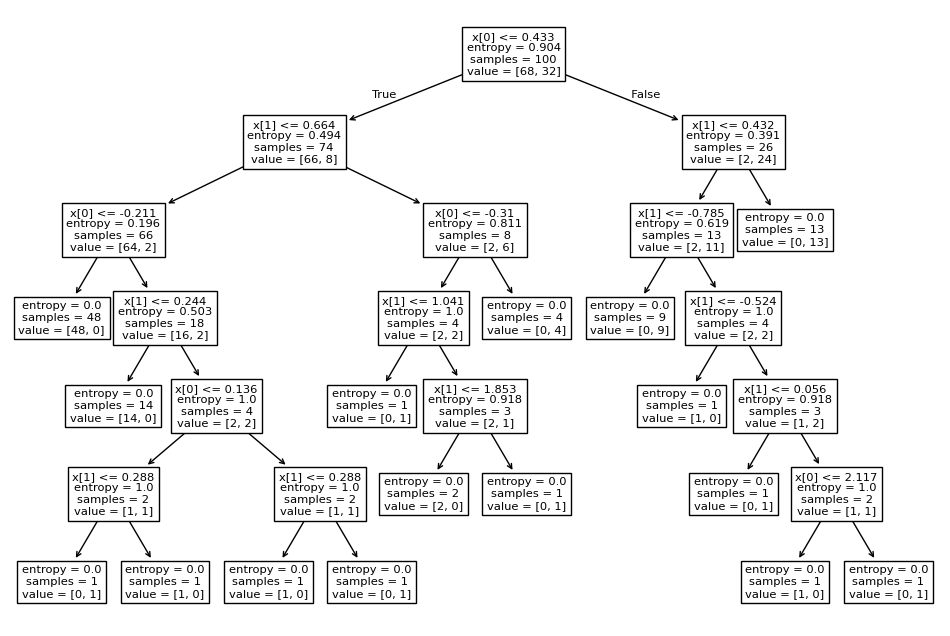

In [14]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(classifier.fit(X_test, y_test))

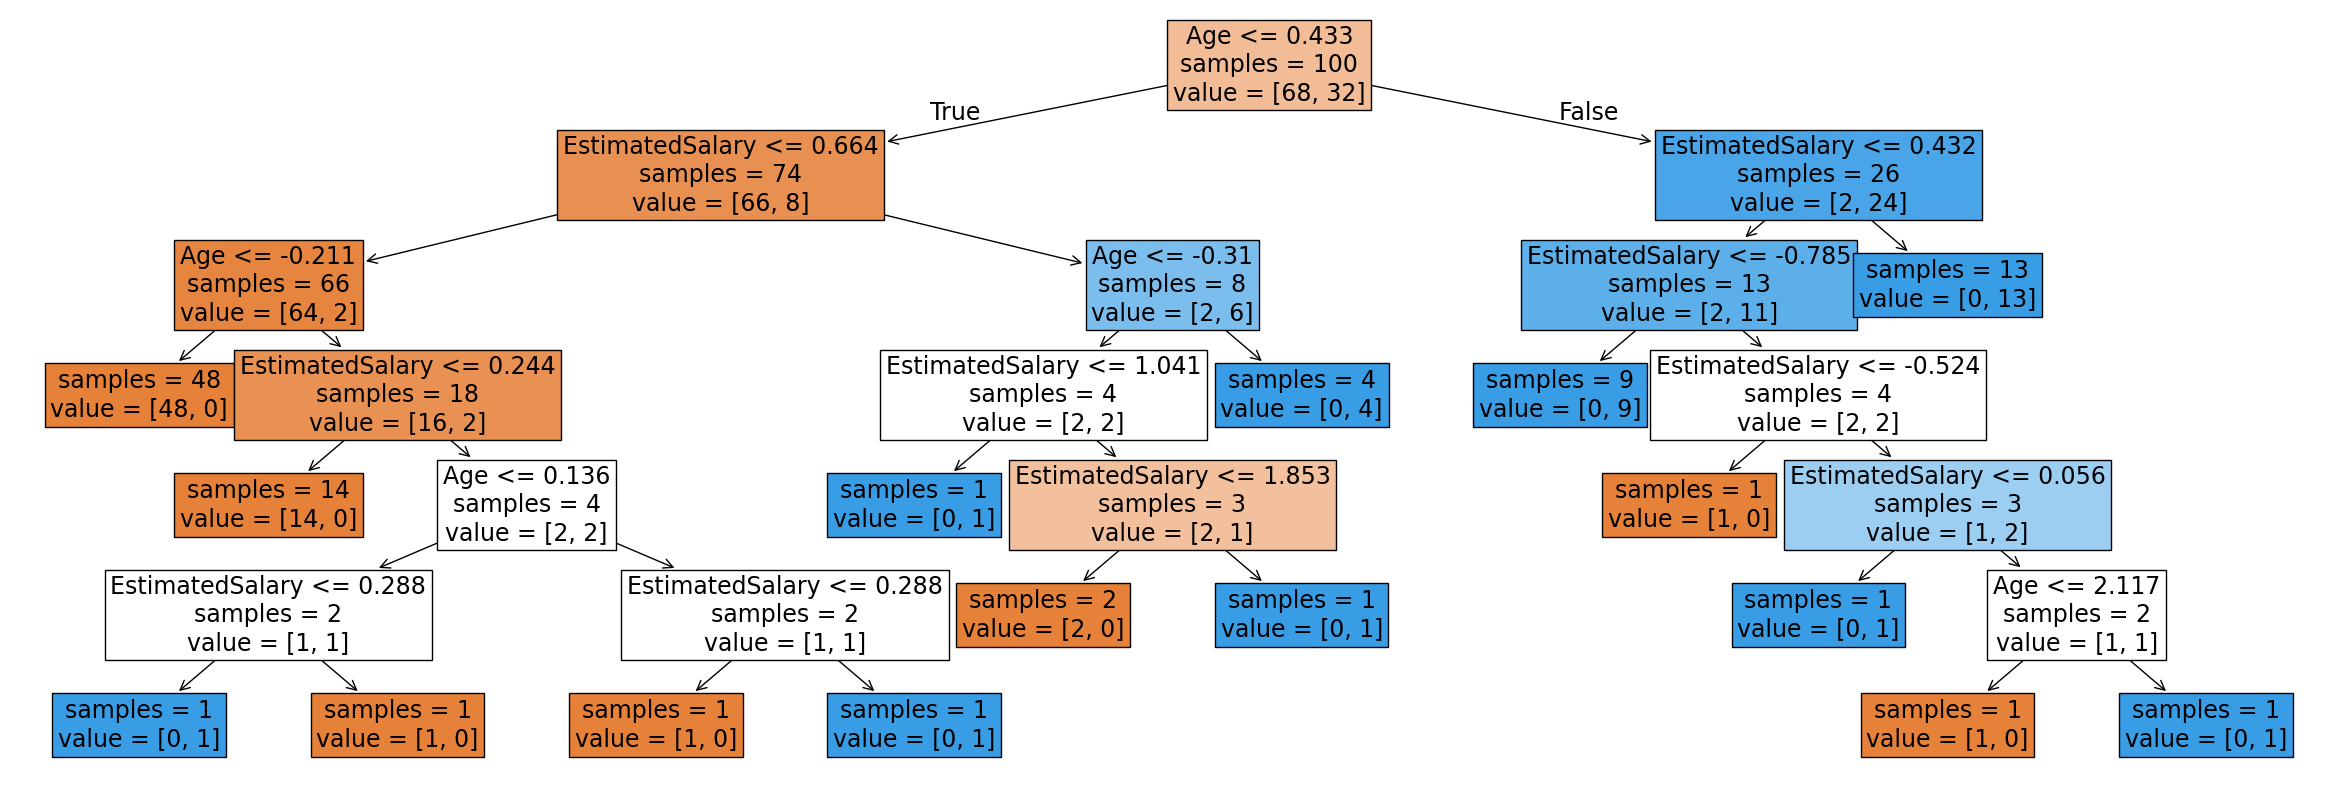

In [15]:
from sklearn.tree import plot_tree
plt.figure(figsize=(30, 10))
plot_tree(
    classifier,
    feature_names=['Age',"EstimatedSalary"],
    impurity=False,
    filled=True,
    fontsize=17
)
plt.show()

# <font color = "purple">Візуалізація результатів навчального набору</font>


<ipython-input-16-be05346e83e3>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


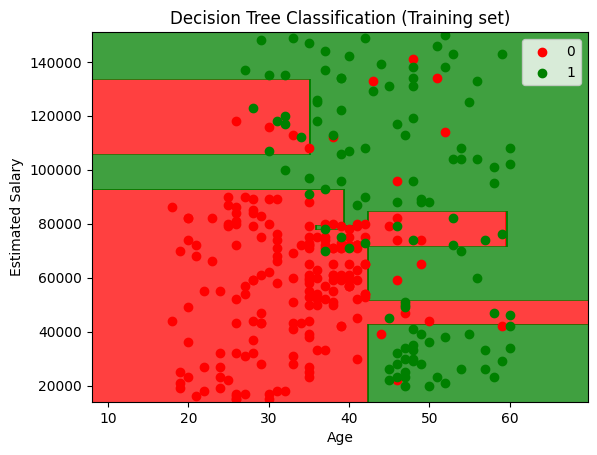

In [16]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# <font color='purple'>Візуалізація результатів тестового набору</font>

<ipython-input-17-656d7b6695af>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


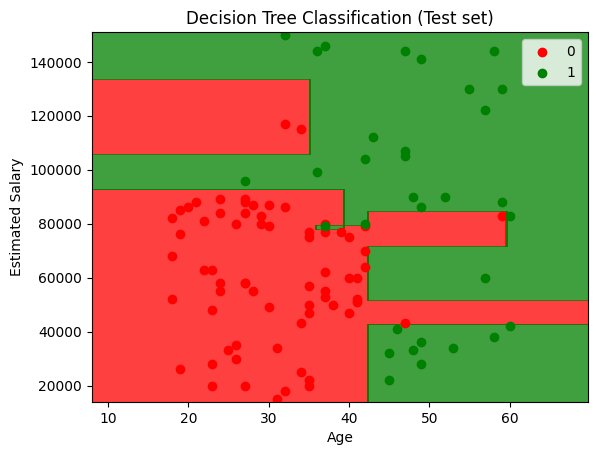

In [17]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classification (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()